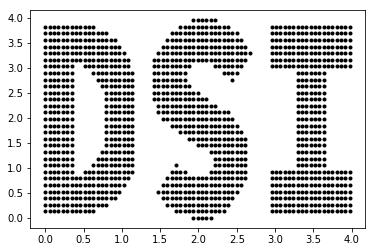

In [2]:
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


with open('dsi_logo.svg') as f:
    s = f.readline()
    l = re.findall(r'cx="\d+\.\d\d" cy="\d+\.\d\d"',s, re.IGNORECASE)
    remove_c = [re.sub(r'c[xy]="', "", coord) for coord in l]
    x_values = [float(re.sub('"', "", a).split()[0]) for a in remove_c]
    y_values = [float(re.sub('"', "", a).split()[1]) for a in remove_c]

x_val_clean = ((x_values - np.min(x_values)) / np.max(x_values) ) * 4.0
y_val_clean = ((y_values - np.min(y_values)) / np.max(y_values) ) * 4.0

D_x = np.array(x_val_clean)[x_val_clean < 1.25]
D_y = np.array(y_val_clean)[x_val_clean < 1.25]

S_x = np.array(x_val_clean)[(x_val_clean > 1.25) & (x_val_clean < 2.75)]
S_y = np.array(y_val_clean)[(x_val_clean > 1.25) & (x_val_clean < 2.75)]

S_x_reflect = -1.0 * S_x + -1.0*np.min(-1.0*S_x) + np.min(S_x)

I_x =  np.array(x_val_clean)[x_val_clean > 2.75]
I_y = np.array(y_val_clean)[x_val_clean >2.75]

dsi_x = np.concatenate([D_x, S_x_reflect, I_x])
dsi_y = np.concatenate([D_y, S_y, I_y])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dsi_x, dsi_y, 'k.')

df = np.matrix([dsi_x, dsi_y])

[ -9.11959132e-17   1.00000000e+00]


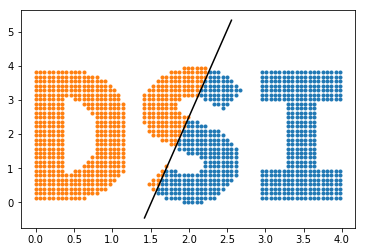

In [25]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df.T, dsi_y)
print lr.coef_

k = KMeans(2)
k.fit(df.T)

c = k.labels_
centers = k.cluster_centers_

x_1, y_1, x_2, y_2 = centers.flatten()
x_c = 0.5*np.abs(x_2 - x_1) + min(x_1, x_2)
y_c = 0.5*np.abs(y_2 - y_1) + min(y_1, y_2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dsi_x[c == 0], dsi_y[c == 0], '.')
ax.plot(dsi_x[c == 1], dsi_y[c == 1], '.')

x = np.unique(dsi_x)
ax.plot(x[len(x)/3 : 2*len(x)/3], -float(x_1-x_2)/(y_1 - y_2)*(x[len(x)/3 : 2*len(x)/3] - x_c) + y_c, 'k')
